<a href="https://colab.research.google.com/github/WhiteHatCyberus/Deep-Model-Evaluation-Intrusion-Detection-System-using-NSL-KDD-CIC-IDS-2018/blob/main/Group6_cicids_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Intrusion Detection System (CIC IDS 2018)

---


### Group 6  - Sleety, Thejus, Tejas and Rahul 
#### Rajagiri School of Engineering and Technology (KTU 2019 Scheme)

## **IDS**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/cicids/cic/02-16-2018.csv')
df.drop(df.loc[df['Label'] == 'Label'].index, inplace=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
metadata = ['fl_dur' #Flow duration
,'tot_fw_pk' #Total packets in the forward direction
,'tot_bw_pk' #Total packets in the backward direction
,'tot_l_fw_pkt' #Total size of packet in forward direction
,'fw_pkt_l_max' #Maximum size of packet in forward direction
,'fw_pkt_l_min' #Minimum size of packet in forward direction
,'fw_pkt_l_avg' #Average size of packet in forward direction
,'fw_pkt_l_std' #Standard deviation size of packet in forward direction
,'Bw_pkt_l_max' #Maximum size of packet in backward direction
,'Bw_pkt_l_min' #Minimum size of packet in backward direction
,'Bw_pkt_l_avg' #Mean size of packet in backward direction
,'Bw_pkt_l_std' #Standard deviation size of packet in backward direction
,'fl_byt_s' #flow byte rate that is number of packets transferred per second
,'fl_pkt_s' #flow packets rate that is number of packets transferred per second
,'fl_iat_avg' #Average time between two flows
,'fl_iat_std' #Standard deviation time two flows
,'fl_iat_max' #Maximum time between two flows
,'fl_iat_min' #Minimum time between two flows
,'fw_iat_tot' #Total time between two packets sent in the forward direction
,'fw_iat_avg' #Mean time between two packets sent in the forward direction
,'fw_iat_std' #Standard deviation time between two packets sent in the forward direction
,'fw_iat_max' #Maximum time between two packets sent in the forward direction
,'fw_iat_min' #Minimum time between two packets sent in the forward direction
,'bw_iat_tot' #Total time between two packets sent in the backward direction
,'bw_iat_avg' #Mean time between two packets sent in the backward direction
,'bw_iat_std' #Standard deviation time between two packets sent in the backward direction
,'bw_iat_max' #Maximum time between two packets sent in the backward direction
,'bw_iat_min' #Minimum time between two packets sent in the backward direction
,'fw_psh_flag' #Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
,'bw_psh_flag' #Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
,'fw_urg_flag' #Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
,'bw_urg_flag' #Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
,'fw_hdr_len' #Total bytes used for headers in the forward direction
,'bw_hdr_len' #Total bytes used for headers in the forward direction
,'fw_pkt_s' #Number of forward packets per second
,'bw_pkt_s' #Number of backward packets per second
,'pkt_len_min' #Minimum length of a flow
,'pkt_len_max' #Maximum length of a flow
,'pkt_len_avg' #Mean length of a flow
,'pkt_len_std' #Standard deviation length of a flow
,'pkt_len_va' #Minimum inter-arrival time of packet
,'fin_cnt' #Number of packets with FIN
,'syn_cnt' #Number of packets with SYN
,'rst_cnt' #Number of packets with RST
,'pst_cnt' #Number of packets with PUSH
,'ack_cnt' #Number of packets with ACK
,'urg_cnt' #Number of packets with URG
,'cwe_cnt' #Number of packets with CWE
,'ece_cnt' #Number of packets with ECE
,'down_up_ratio' #Download and upload ratio
,'pkt_size_avg' #Average size of packet
,'fw_seg_avg' #Average size observed in the forward direction
,'bw_seg_avg' #Average size observed in the backward direction
,'fw_byt_blk_avg' #Average number of bytes bulk rate in the forward direction
,'fw_pkt_blk_avg' #Average number of packets bulk rate in the forward direction
,'fw_blk_rate_avg' #Average number of bulk rate in the forward direction
,'bw_byt_blk_avg' #Average number of bytes bulk rate in the backward direction
,'bw_pkt_blk_avg' #Average number of packets bulk rate in the backward direction
,'bw_blk_rate_avg' #Average number of bulk rate in the backward direction
,'subfl_fw_pk' #The average number of packets in a sub flow in the forward direction
,'subfl_fw_byt' #The average number of bytes in a sub flow in the forward direction
,'subfl_bw_pkt' #The average number of packets in a sub flow in the backward direction
,'subfl_bw_byt' #The average number of bytes in a sub flow in the backward direction
,'fw_win_byt' #Number of bytes sent in initial window in the forward direction
,'bw_win_byt' ## of bytes sent in initial window in the backward direction
,'Fw_act_pkt' ## of packets with at least 1 byte of TCP data payload in the forward direction
,'fw_seg_min' #Minimum segment size observed in the forward direction
,'atv_avg' #Mean time a flow was active before becoming idle
,'atv_std' #Standard deviation time a flow was active before becoming idle
,'atv_max' #Maximum time a flow was active before becoming idle
,'atv_min' #Minimum time a flow was active before becoming idle
,'idl_avg' #Mean time a flow was idle before becoming active
,'idl_std' #Standard deviation time a flow was idle before becoming active
,'idl_max' #Maximum time a flow was idle before becoming active
,'idl_min' #Minimum time a flow was idle before becoming active
]

In [ ]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

## **LSTM**

### **Binary Class**

In [ ]:
features = ['Timestamp', 'Fwd Pkt Len Std', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Max', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Flow IAT Std',
       'Bwd Pkt Len Std', 'Bwd Seg Size Avg', 'Pkt Size Avg',
       'Subflow Fwd Byts']

In [ ]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [ ]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.fillna(0)
labels = df['Label']    #For multiclass classification


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df['Target']=df['Label'].apply(targetify)
y = df['Target']

Normal Execution

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838859, 11) (838859,)
(209715, 11) (209715,)


Faster Execution (1% rows)

In [ ]:
# selecting 1% of random rows for better running time

X_train = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(83886, 11) (83886,)
(20972, 11) (20972,)


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(x_scaled,columns=features)
x_scaled_test = min_max_scaler.fit_transform(X_test.values)
X_test = pd.DataFrame(x_scaled_test,columns=features)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100000, 64), # since it doesn't consider "words," the embedding doesn't really matter
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    # tf.keras.layers.Dense(1, activation='softmax') # loss too big
])

In [ ]:
model.compile(loss='binary_crossentropy',
              # optimizer='sgd', # almost same
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history = model.fit(X_train.values, y_train.values, epochs=3)
model.save('drive/MyDrive/cicids/LSTM_BC')

Epoch 1/3
2622/2622 [==============================] - 244s 91ms/step - loss: 0.1005 - accuracy: 0.9488
Epoch 2/3
2622/2622 [==============================] - 246s 94ms/step - loss: 0.0249 - accuracy: 0.9959
Epoch 3/3
2622/2622 [==============================] - 252s 96ms/step - loss: 0.0248 - accuracy: 0.9959


In [ ]:
pred_class = model.predict(X_test.values[:])
predictions = [int(round(x[0])) for x in pred_class]
true_class = list(y_test)
np.sum(predictions == y_test.values) / len(y_test.values)

656/656 [==============================] - 5s 6ms/step


0.9957562464238031

In [ ]:
def myRound(x, r):
    if x>r/float(1000):
        return 1
    else:
        return 0

In [ ]:
compdf = pd.DataFrame({'pred_class':predictions, 'true_class':true_class})
compdf = compdf.sort_values('pred_class', ascending=True)
predictions = list(compdf['pred_class'].apply(myRound, r=225))
true_class = list(compdf['true_class'])

In [ ]:
confm = confusion_matrix(true_class, predictions)
confm

array([[ 8660,    89],
       [    0, 12223]])

### **Multi Class**

In [ ]:
categories = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce',
              'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest',
              'DoS attacks-Hulk', 'Brute Force -Web', 'Brute Force -XSS',
              'SQL Injection', 'Infiltration', 'Bot']

In [ ]:
encoder = LabelEncoder()
encoder.fit(categories)
y = encoder.transform(labels)
y = np_utils.to_categorical(y, num_classes=12)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100000, 64, embeddings_regularizer='l2'), # since it doesn't consider "words," the embedding doesn't really matter
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu', use_bias=True, bias_regularizer='l2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='sigmoid')
    # tf.keras.layers.Dense(1, activation='softmax') # loss too big
])

In [ ]:
X_train.shape, y_train.shape

((83886, 11), (83886,))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              # optimizer='sgd', # almost same
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history = model.fit(X_train.values, y_train.values, epochs=3)
model.save('drive/MyDrive/cicids/LSTM_MC_L2')

Epoch 1/3
2622/2622 [==============================] - 220s 82ms/step - loss: 3.3247 - accuracy: 0.9006
Epoch 2/3
2622/2622 [==============================] - 203s 77ms/step - loss: 0.0320 - accuracy: 0.9955
Epoch 3/3
2622/2622 [==============================] - 203s 77ms/step - loss: 0.0291 - accuracy: 0.9959


In [ ]:
pred_class = model.predict(X_test.values[:])
predictions = [int(round(x[0])) for x in pred_class]
true_class = list(y_test)
np.sum(predictions == y_test.values) / len(y_test.values)

656/656 [==============================] - 5s 6ms/step


0.5828247186725157

In [ ]:
compdf = pd.DataFrame({'pred_class':predictions, 'true_class':true_class})
compdf = compdf.sort_values('pred_class', ascending=True)
predictions = list(compdf['pred_class'].apply(myRound, r=225))
true_class = list(compdf['true_class'])

In [ ]:
confm = confusion_matrix(true_class, predictions)
confm

array([[    0,  8749],
       [    0, 12223]])

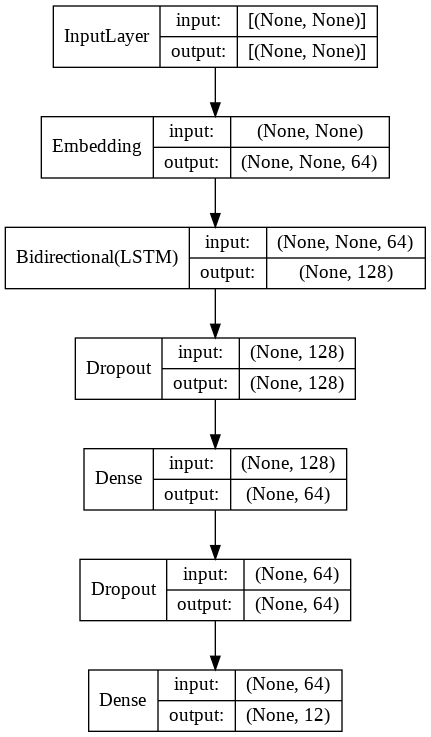

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)